In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import warnings as wrn
from utils.helper import *
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning)
wrn.filterwarnings('ignore', category = RuntimeWarning)
%matplotlib inline

In [2]:
DATA_PATH = "data/"

In [3]:
data = pd.read_csv(DATA_PATH + "Database Ymelia Meiru Content List - db.csv")
data.tail()

,id,title,views,date,url,game_name,content_name,topic,duration,start_stream,end_stream,note,Last Update
29,30,Lanjut Part 03! Agar tidak mati konyol teman,759,20-December-2022,https://youtu.be/IRKTmQdokrc,Magicat!,NaN,Game,02:22:17,20:30,22:52,NaN,NaN
30,31,Menambah imun atau semakin loyo? Nobar horror ...,1180,21-December-2022,https://www.youtube.com/watch?v=ixLgRTUizYg,NaN,NaN,Free Talk,03:10:35,20:30,23:40,NaN,NaN
31,32,"Mencoba main DBD, apakah perlu kisi-kisi?",799,23-December-2022,https://www.youtube.com/watch?v=HJmXMqwvU6s,Dead by Daylight,NaN,Game,03:56:59,20:30,00:26,NaN,NaN
32,33,Berbicara dingin! PADORU didepan mata~,703,24-December-2022,https://www.youtube.com/watch?v=sGgxV7PRM8A,NaN,NaN,Free Talk,02:05:12,20:00,22:05,NaN,NaN
33,34,"Harusnya sih video nyebelin, tapi aku penyabar",838,27-December-2022,https://www.youtube.com/watch?v=wBod7psnVsw,NaN,Video Reaction,Free Talk,02:11:20,20:30,22:41,NaN,NaN


In [4]:
data.shape

(34, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            34 non-null     int64  
 1   title         34 non-null     object 
 2   views         34 non-null     int64  
 3   date          34 non-null     object 
 4   url           34 non-null     object 
 5   game_name     18 non-null     object 
 6   content_name  8 non-null      object 
 7   topic         34 non-null     object 
 8   duration      34 non-null     object 
 9   start_stream  34 non-null     object 
 10  end_stream    34 non-null     object 
 11  note          0 non-null      float64
 12  Last Update   2 non-null      object 
dtypes: float64(1), int64(2), object(10)
memory usage: 3.6+ KB


In [6]:
COLS = ['url', 'note', "Last Update"]

In [7]:
data.drop(COLS, axis=1, inplace=True)

### Impute missing values with `UNKNOWN` value

In [8]:
impute_missing_values(data=data, columns = ["game_name", "content_name"])

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream
0,1,Ayo kita ngobrol santai dan minum teh!,547,30-September-2022,UNKNOWN,UNKNOWN,Free Talk,02:04:42,20:30,22:34
1,2,Bertani mengumpulkan buah!!,479,1-October-2022,Stardew Valley,UNKNOWN,Game,02:43:10,20:30,23:13
2,3,Ni hao ma? Xie xie ni!,421,2-October-2022,UNKNOWN,Duolingo,Free Talk,02:09:23,20:30,22:39
3,4,Hantu bengkok yang tidak seram,575,4-October-2022,The Crooked Man,UNKNOWN,Game,03:56:20,20:00,23:56
4,5,Apa yang harus kita lakukan saat hujan?,947,07-October-2022,UNKNOWN,UNKNOWN,Free Talk,02:32:35,20:30,23:02
5,6,"Ayo ngobrol, kali ini beneran",612,15-October-2022,UNKNOWN,UNKNOWN,Free Talk,01:55:27,21:00,22:55
6,7,"Hantu bengkok yang tidak seram, Part 02!",620,17-October-2022,The Crooked Man,UNKNOWN,Game,03:16:48,20:30,23:46
7,8,"Menjadi petani professional sungguhan, ini ser...",790,18-October-2022,Stardew Valley,UNKNOWN,Game,02:28:58,20:30,22:58
8,9,Terjebak di hutan? Ezpz sih ini sepertinya,694,20-October-2022,Death Forest,UNKNOWN,Game,02:29:23,20:30,22:59
9,10,Apa yang kalian lakukan malam ini?,801,23-October-2022,UNKNOWN,UNKNOWN,Free Talk,02:32:23,20:00,22:32


In [9]:
data.isna().sum()

id              0
title           0
views           0
date            0
game_name       0
content_name    0
topic           0
duration        0
start_stream    0
end_stream      0
dtype: int64

### Convert Data into datetime

#### Get Days

In [10]:
convert_date_to_days(data=data)

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days
0,1,Ayo kita ngobrol santai dan minum teh!,547,2022-09-30,UNKNOWN,UNKNOWN,Free Talk,02:04:42,20:30,22:34,Jum'at
1,2,Bertani mengumpulkan buah!!,479,2022-10-01,Stardew Valley,UNKNOWN,Game,02:43:10,20:30,23:13,Sabtu
2,3,Ni hao ma? Xie xie ni!,421,2022-10-02,UNKNOWN,Duolingo,Free Talk,02:09:23,20:30,22:39,Minggu
3,4,Hantu bengkok yang tidak seram,575,2022-10-04,The Crooked Man,UNKNOWN,Game,03:56:20,20:00,23:56,Selasa
4,5,Apa yang harus kita lakukan saat hujan?,947,2022-10-07,UNKNOWN,UNKNOWN,Free Talk,02:32:35,20:30,23:02,Jum'at
5,6,"Ayo ngobrol, kali ini beneran",612,2022-10-15,UNKNOWN,UNKNOWN,Free Talk,01:55:27,21:00,22:55,Sabtu
6,7,"Hantu bengkok yang tidak seram, Part 02!",620,2022-10-17,The Crooked Man,UNKNOWN,Game,03:16:48,20:30,23:46,Senin
7,8,"Menjadi petani professional sungguhan, ini ser...",790,2022-10-18,Stardew Valley,UNKNOWN,Game,02:28:58,20:30,22:58,Selasa
8,9,Terjebak di hutan? Ezpz sih ini sepertinya,694,2022-10-20,Death Forest,UNKNOWN,Game,02:29:23,20:30,22:59,Kamis
9,10,Apa yang kalian lakukan malam ini?,801,2022-10-23,UNKNOWN,UNKNOWN,Free Talk,02:32:23,20:00,22:32,Minggu


#### Get Hours

In [11]:
get_hours(data=data)

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours
0,1,Ayo kita ngobrol santai dan minum teh!,547,2022-09-30,UNKNOWN,UNKNOWN,Free Talk,02:04:42,20:30:00,22:34,Jum'at,20
1,2,Bertani mengumpulkan buah!!,479,2022-10-01,Stardew Valley,UNKNOWN,Game,02:43:10,20:30:00,23:13,Sabtu,20
2,3,Ni hao ma? Xie xie ni!,421,2022-10-02,UNKNOWN,Duolingo,Free Talk,02:09:23,20:30:00,22:39,Minggu,20
3,4,Hantu bengkok yang tidak seram,575,2022-10-04,The Crooked Man,UNKNOWN,Game,03:56:20,20:00:00,23:56,Selasa,20
4,5,Apa yang harus kita lakukan saat hujan?,947,2022-10-07,UNKNOWN,UNKNOWN,Free Talk,02:32:35,20:30:00,23:02,Jum'at,20
5,6,"Ayo ngobrol, kali ini beneran",612,2022-10-15,UNKNOWN,UNKNOWN,Free Talk,01:55:27,21:00:00,22:55,Sabtu,21
6,7,"Hantu bengkok yang tidak seram, Part 02!",620,2022-10-17,The Crooked Man,UNKNOWN,Game,03:16:48,20:30:00,23:46,Senin,20
7,8,"Menjadi petani professional sungguhan, ini ser...",790,2022-10-18,Stardew Valley,UNKNOWN,Game,02:28:58,20:30:00,22:58,Selasa,20
8,9,Terjebak di hutan? Ezpz sih ini sepertinya,694,2022-10-20,Death Forest,UNKNOWN,Game,02:29:23,20:30:00,22:59,Kamis,20
9,10,Apa yang kalian lakukan malam ini?,801,2022-10-23,UNKNOWN,UNKNOWN,Free Talk,02:32:23,20:00:00,22:32,Minggu,20


### Get count days for Livestream 

In [12]:
data["days"].value_counts()

Rabu      8
Selasa    7
Jum'at    6
Sabtu     6
Minggu    4
Kamis     2
Senin     1
Name: days, dtype: int64

In [13]:
print(f"Selama 3 bulan ini, Imel sudah melakukan stream sebanyak {len(data.index)} kali")

Selama 3 bulan ini, Imel sudah melakukan stream sebanyak 34 kali


### Plot Livestream Days in 3 months 

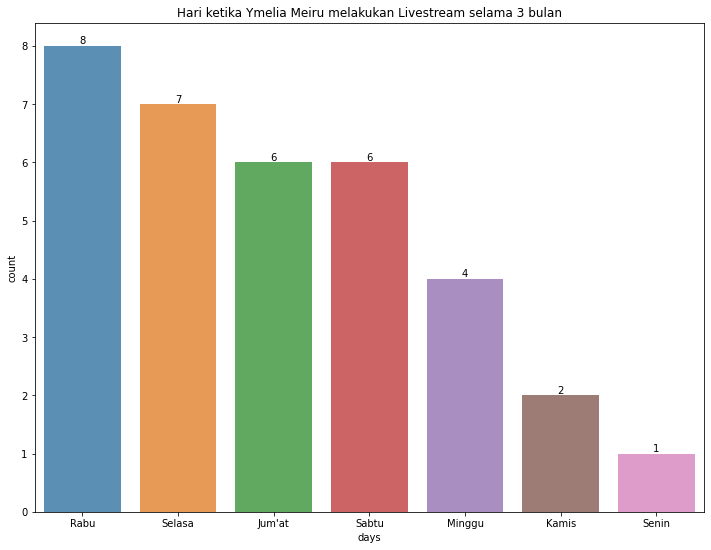

In [14]:
plot_count_days(data=data, username="Ymelia Meiru")

### Get Average Views based on Days

In [15]:
get_avg_days = round(data.groupby(["days"])['views'].mean().reindex(["Senin","Selasa","Rabu","Kamis","Jum'at","Sabtu","Minggu"]), 2)

In [16]:
get_avg_days

days
Senin     620.00
Selasa    765.43
Rabu      922.88
Kamis     643.50
Jum'at    762.67
Sabtu     789.67
Minggu    755.00
Name: views, dtype: float64

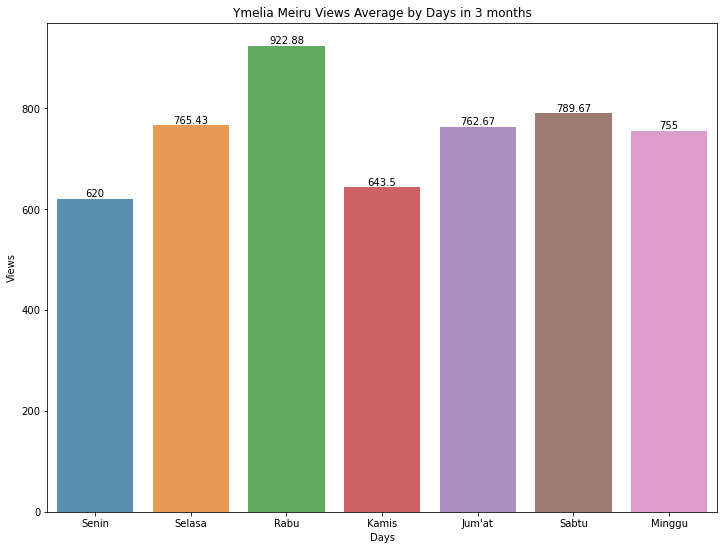

In [17]:
plot_avg_days_views(data=data,
                    var_name=get_avg_days,
                    username="Ymelia Meiru")

### Get count hours livestream 

In [18]:
data["hours"].value_counts()

20    33
21     1
Name: hours, dtype: int64

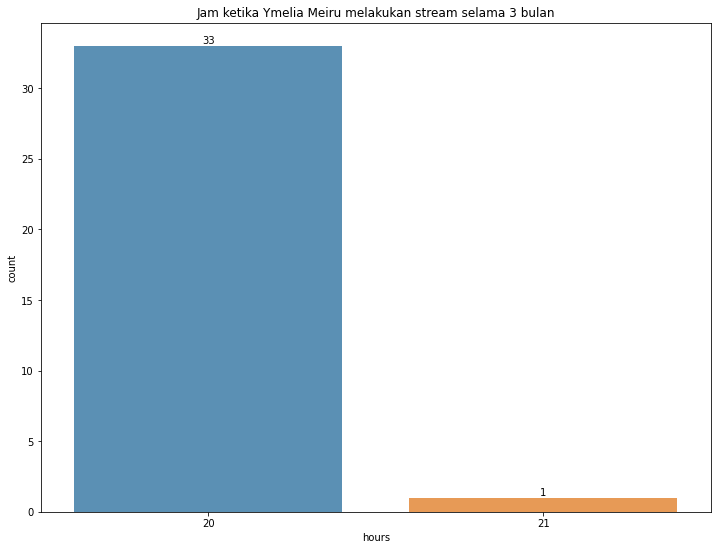

In [19]:
plot_count_hours(data=data, username="Ymelia Meiru")

### Trend Views in 3 months 

In [20]:
min(data["date"]), max(data["date"])

(Timestamp('2022-09-30 00:00:00'), Timestamp('2022-12-27 00:00:00'))

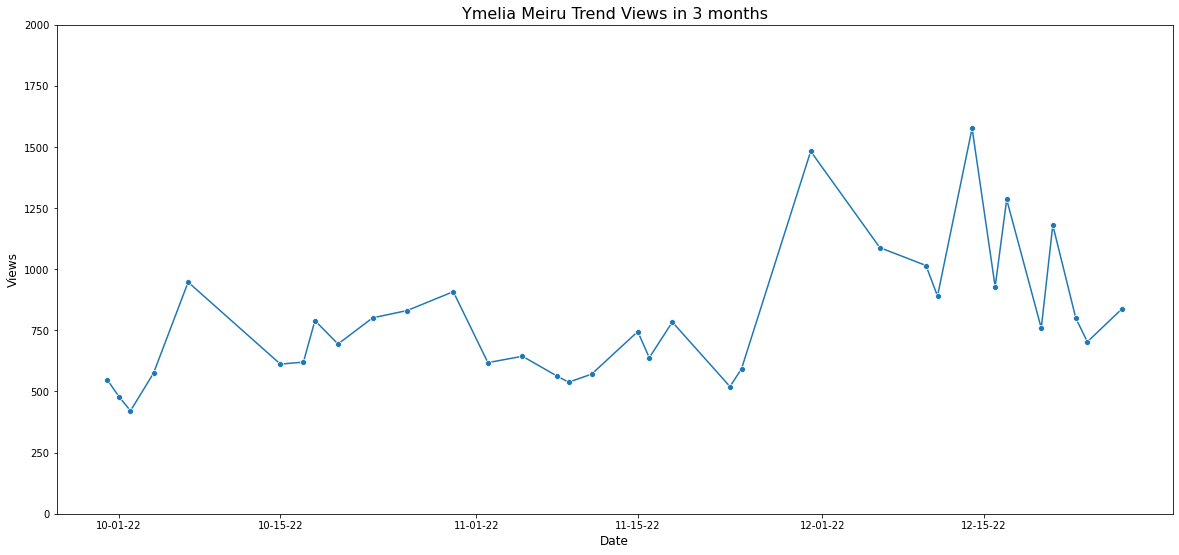

In [21]:
plot_trend_views(data=data, username="Ymelia Meiru", max_limit=2000)

In [22]:
min_views = min(data["views"])
min_views

421

In [23]:
data[data["views"] == min_views]

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours
2,3,Ni hao ma? Xie xie ni!,421,2022-10-02,UNKNOWN,Duolingo,Free Talk,02:09:23,20:30:00,22:39,Minggu,20


In [24]:
max_views = max(data["views"])
max_views

1576

In [25]:
data[data["views"] == max_views]

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours
26,27,Berlari untuk sesuatu yang misterius,1576,2022-12-14,Inside,UNKNOWN,Game,04:39:37,20:30:00,01:09,Rabu,20


### Views distribution 

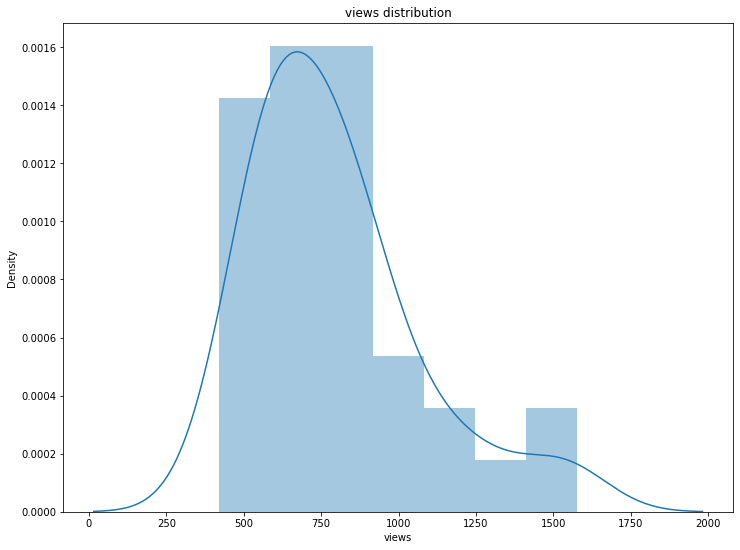

In [26]:
plot_distribution(data=data, col="views")

### Get average views 

In [27]:
mean = np.average(data['views'])
mean

793.5882352941177

### Get median views 

In [28]:
median = np.median(data['views'])
median

752.0

### Get average views in each hours

In [29]:
data.head()

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours
0,1,Ayo kita ngobrol santai dan minum teh!,547,2022-09-30,UNKNOWN,UNKNOWN,Free Talk,02:04:42,20:30:00,22:34,Jum'at,20
1,2,Bertani mengumpulkan buah!!,479,2022-10-01,Stardew Valley,UNKNOWN,Game,02:43:10,20:30:00,23:13,Sabtu,20
2,3,Ni hao ma? Xie xie ni!,421,2022-10-02,UNKNOWN,Duolingo,Free Talk,02:09:23,20:30:00,22:39,Minggu,20
3,4,Hantu bengkok yang tidak seram,575,2022-10-04,The Crooked Man,UNKNOWN,Game,03:56:20,20:00:00,23:56,Selasa,20
4,5,Apa yang harus kita lakukan saat hujan?,947,2022-10-07,UNKNOWN,UNKNOWN,Free Talk,02:32:35,20:30:00,23:02,Jum'at,20


In [30]:
avg_views_hours = round(data.groupby(['hours'])["views"].mean(), 2)

In [31]:
avg_views_hours

hours
20    799.09
21    612.00
Name: views, dtype: float64

### Plot Average Views in each Hours

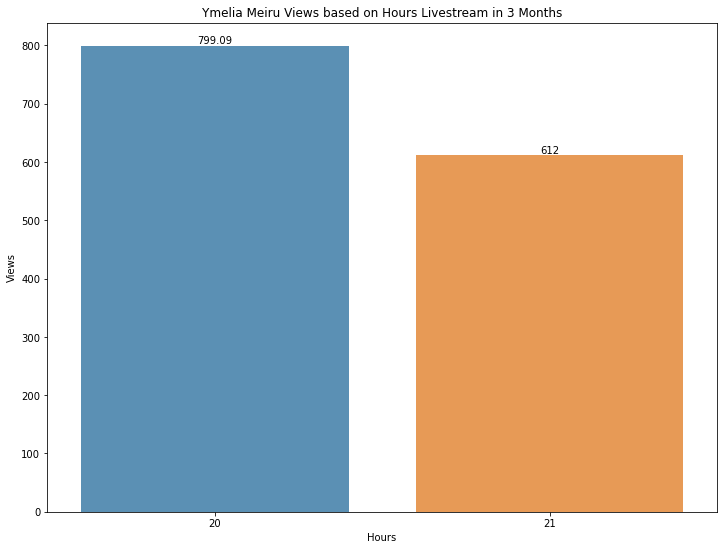

In [32]:
plot_avg_views_hours(data=data, var_name=avg_views_hours, username="Ymelia Meiru")

### Convert Timestamp duration to Minutes

In [33]:
convert_timestamp_to_minutes(data=data)

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
0,1,Ayo kita ngobrol santai dan minum teh!,547,2022-09-30,UNKNOWN,UNKNOWN,Free Talk,02:04:42,20:30:00,22:34,Jum'at,20,124.70
1,2,Bertani mengumpulkan buah!!,479,2022-10-01,Stardew Valley,UNKNOWN,Game,02:43:10,20:30:00,23:13,Sabtu,20,163.17
2,3,Ni hao ma? Xie xie ni!,421,2022-10-02,UNKNOWN,Duolingo,Free Talk,02:09:23,20:30:00,22:39,Minggu,20,129.38
3,4,Hantu bengkok yang tidak seram,575,2022-10-04,The Crooked Man,UNKNOWN,Game,03:56:20,20:00:00,23:56,Selasa,20,236.33
4,5,Apa yang harus kita lakukan saat hujan?,947,2022-10-07,UNKNOWN,UNKNOWN,Free Talk,02:32:35,20:30:00,23:02,Jum'at,20,152.58
5,6,"Ayo ngobrol, kali ini beneran",612,2022-10-15,UNKNOWN,UNKNOWN,Free Talk,01:55:27,21:00:00,22:55,Sabtu,21,115.45
6,7,"Hantu bengkok yang tidak seram, Part 02!",620,2022-10-17,The Crooked Man,UNKNOWN,Game,03:16:48,20:30:00,23:46,Senin,20,196.80
7,8,"Menjadi petani professional sungguhan, ini ser...",790,2022-10-18,Stardew Valley,UNKNOWN,Game,02:28:58,20:30:00,22:58,Selasa,20,148.97
8,9,Terjebak di hutan? Ezpz sih ini sepertinya,694,2022-10-20,Death Forest,UNKNOWN,Game,02:29:23,20:30:00,22:59,Kamis,20,149.38
9,10,Apa yang kalian lakukan malam ini?,801,2022-10-23,UNKNOWN,UNKNOWN,Free Talk,02:32:23,20:00:00,22:32,Minggu,20,152.38


### Average per minutes

In [34]:
mean_duration = np.average(data['convert_duration_minutes'])

# di convert jadi hours lagi?
round(mean_duration / 60, 2)

3.0

### Distribution Plot Stream Duration 

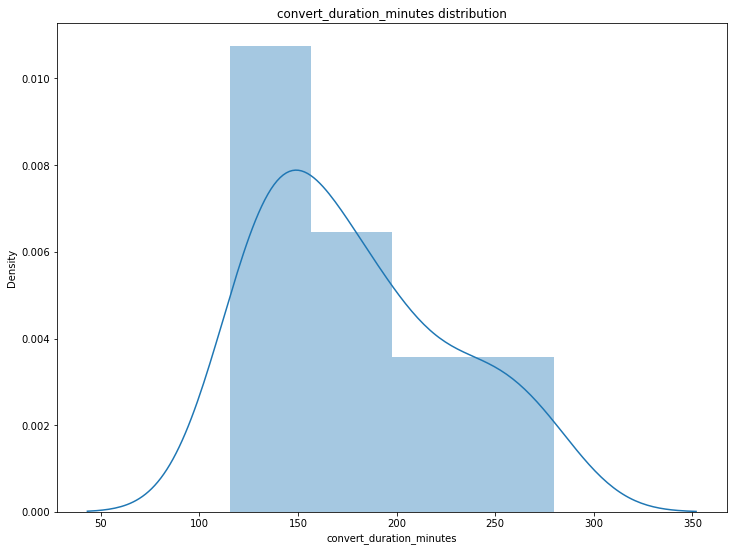

In [35]:
plot_distribution(data=data, col="convert_duration_minutes")

### Get average Stream Duration by Days 

In [36]:
avg_stream_duration_days = round(data.groupby('days')['convert_duration_minutes'].mean().reindex(["Senin","Selasa","Rabu","Kamis","Jum'at","Sabtu","Minggu"]) / 60, 2)

In [37]:
avg_stream_duration_days

days
Senin     3.28
Selasa    2.70
Rabu      3.26
Kamis     2.72
Jum'at    3.17
Sabtu     3.00
Minggu    2.78
Name: convert_duration_minutes, dtype: float64

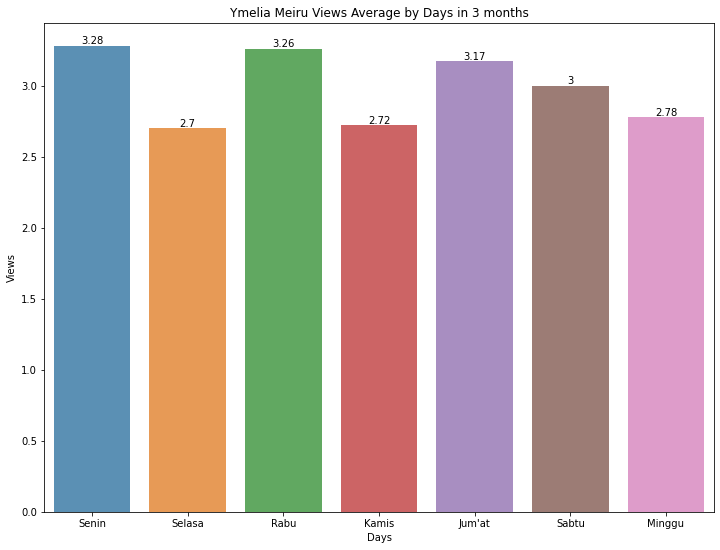

In [38]:
plot_avg_days_views(data=data, var_name=avg_stream_duration_days, username='Ymelia Meiru')

In [39]:
data[data["days"] == "Senin"]

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
6,7,"Hantu bengkok yang tidak seram, Part 02!",620,2022-10-17,The Crooked Man,UNKNOWN,Game,03:16:48,20:30:00,23:46,Senin,20,196.8


In [40]:
data[data["days"] == "Rabu"]

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
10,11,Meninggalkan jejak si botak disini,831,2022-10-26,Getting Over It,UNKNOWN,Game,02:47:11,20:30:00,23:17,Rabu,20,167.18
12,13,Bisakah buwong gambar??,618,2022-11-02,UNKNOWN,Meirukis,Drawing,02:10:50,20:30:00,22:40,Rabu,20,130.83
15,16,"Mari menamatkan pria bengkok, tamat beneran",538,2022-11-09,The Crooked Man,UNKNOWN,Game,03:11:39,20:30:00,23:41,Rabu,20,191.65
18,19,Beep! Beep! Berpetualang bersama Catto,638,2022-11-16,Magicat!,UNKNOWN,Game,02:29:52,20:30:00,22:59,Rabu,20,149.87
20,21,Lanjut berpetualang bersama Catto episode 02!,520,2022-11-23,Magicat!,UNKNOWN,Game,03:12:41,20:00:00,23:12,Rabu,20,192.68
22,23,Mari kita ngobrol random dan nobar (mediashare...,1482,2022-11-30,UNKNOWN,UNKNOWN,Free Talk,04:21:53,20:30:00,00:51,Rabu,20,261.88
26,27,Berlari untuk sesuatu yang misterius,1576,2022-12-14,Inside,UNKNOWN,Game,04:39:37,20:30:00,01:09,Rabu,20,279.62
30,31,Menambah imun atau semakin loyo? Nobar horror ...,1180,2022-12-21,UNKNOWN,UNKNOWN,Free Talk,03:10:35,20:30:00,23:40,Rabu,20,190.58


In [41]:
data[data["days"] == "Jum'at"]

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
0,1,Ayo kita ngobrol santai dan minum teh!,547,2022-09-30,UNKNOWN,UNKNOWN,Free Talk,02:04:42,20:30:00,22:34,Jum'at,20,124.70
4,5,Apa yang harus kita lakukan saat hujan?,947,2022-10-07,UNKNOWN,UNKNOWN,Free Talk,02:32:35,20:30:00,23:02,Jum'at,20,152.58
16,17,"Iyakah? Astaga ngerinya, ngeri-ngeri",571,2022-11-11,UNKNOWN,Scary Video,Free Talk,02:52:28,20:30:00,23:22,Jum'at,20,172.47
19,20,Kembali ke masa lampau sebentar,784,2022-11-18,UNKNOWN,Y-MAIL BOX!,Free Talk,03:23:37,20:30:00,23:53,Jum'at,20,203.62
27,28,Bermain SONIC tapi pengalihan isu ke Rijal INSIDE,928,2022-12-16,Sonic Mania,UNKNOWN,Game,04:12:17,20:30:00,00:42,Jum'at,20,252.28
31,32,"Mencoba main DBD, apakah perlu kisi-kisi?",799,2022-12-23,Dead by Daylight,UNKNOWN,Game,03:56:59,20:30:00,00:26,Jum'at,20,236.98


In [42]:
data[data["convert_duration_minutes"] == max(data["convert_duration_minutes"])]

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
26,27,Berlari untuk sesuatu yang misterius,1576,2022-12-14,Inside,UNKNOWN,Game,04:39:37,20:30:00,01:09,Rabu,20,279.62


In [43]:
data[data["convert_duration_minutes"] == min(data["convert_duration_minutes"])]

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
5,6,"Ayo ngobrol, kali ini beneran",612,2022-10-15,UNKNOWN,UNKNOWN,Free Talk,01:55:27,21:00:00,22:55,Sabtu,21,115.45


### Check Correlation

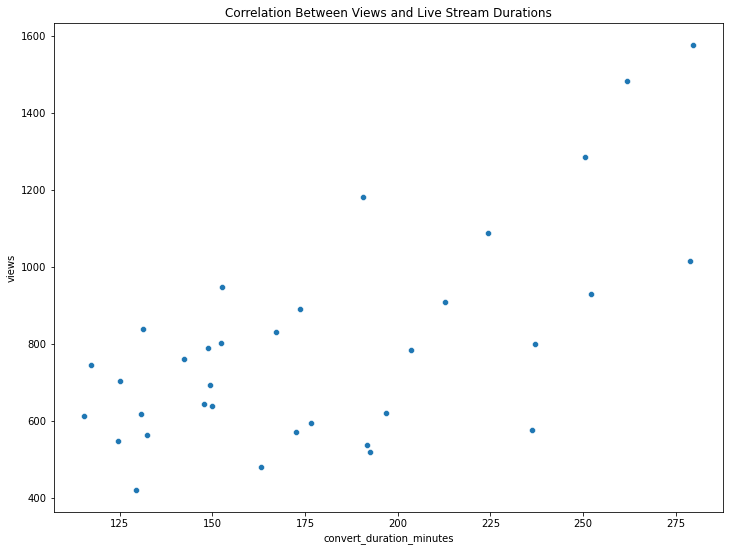

In [44]:
plot_correlation(data=data)

- Berdasarkan hasil scatter plot dapat dilihat, kalo semakin lama streaming maka views nya akan semakin banyak

### Imel Livestream Topics 

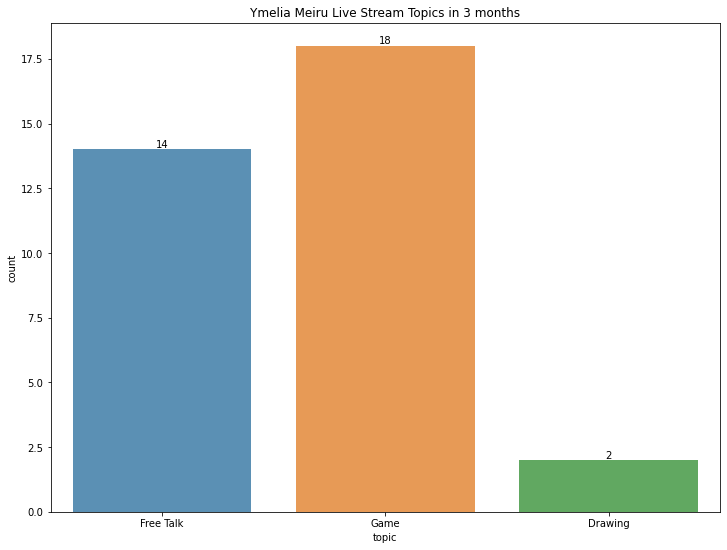

In [45]:
plot_livestream_topic(data=data, col_name="topic", username="Ymelia Meiru")

### Free Talk Topic 

In [46]:
free_talk = data[data["topic"] == "Free Talk"]

In [47]:
free_talk.head()

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
0,1,Ayo kita ngobrol santai dan minum teh!,547,2022-09-30,UNKNOWN,UNKNOWN,Free Talk,02:04:42,20:30:00,22:34,Jum'at,20,124.70
2,3,Ni hao ma? Xie xie ni!,421,2022-10-02,UNKNOWN,Duolingo,Free Talk,02:09:23,20:30:00,22:39,Minggu,20,129.38
4,5,Apa yang harus kita lakukan saat hujan?,947,2022-10-07,UNKNOWN,UNKNOWN,Free Talk,02:32:35,20:30:00,23:02,Jum'at,20,152.58
5,6,"Ayo ngobrol, kali ini beneran",612,2022-10-15,UNKNOWN,UNKNOWN,Free Talk,01:55:27,21:00:00,22:55,Sabtu,21,115.45
9,10,Apa yang kalian lakukan malam ini?,801,2022-10-23,UNKNOWN,UNKNOWN,Free Talk,02:32:23,20:00:00,22:32,Minggu,20,152.38


In [48]:
free_talk[free_talk["views"] == max(free_talk["views"])]

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
22,23,Mari kita ngobrol random dan nobar (mediashare...,1482,2022-11-30,UNKNOWN,UNKNOWN,Free Talk,04:21:53,20:30:00,00:51,Rabu,20,261.88


In [49]:
free_talk[free_talk["views"] == min(free_talk["views"])]

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
2,3,Ni hao ma? Xie xie ni!,421,2022-10-02,UNKNOWN,Duolingo,Free Talk,02:09:23,20:30:00,22:39,Minggu,20,129.38


In [50]:
avg_stream_free_talk = round(free_talk.groupby('days')['convert_duration_minutes'].mean().reindex(["Senin","Selasa","Rabu","Kamis","Jum'at","Sabtu","Minggu"]) / 60, 2)

In [51]:
avg_stream_free_talk

days
Senin      NaN
Selasa    2.19
Rabu      3.77
Kamis      NaN
Jum'at    2.72
Sabtu     2.73
Minggu    2.78
Name: convert_duration_minutes, dtype: float64

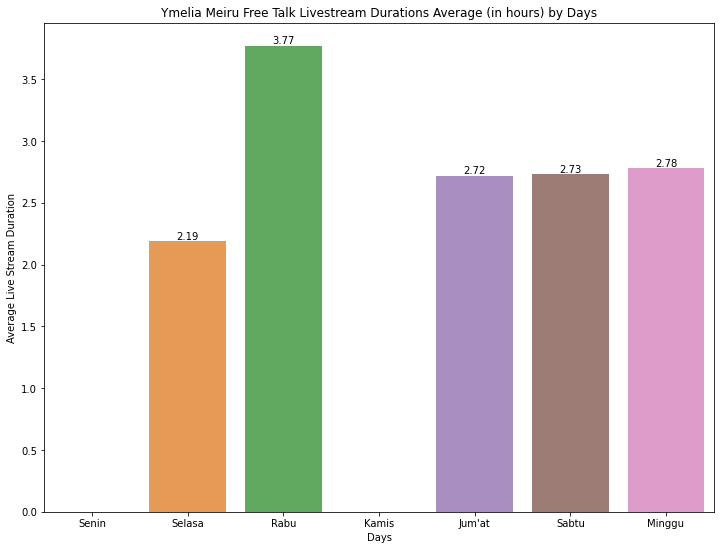

In [52]:
plt.figure(figsize=(12,9))
ax = sns.barplot(avg_stream_free_talk.index, avg_stream_free_talk.values, alpha=0.8)
ax.bar_label(ax.containers[0])
plt.xlabel("Days")
plt.ylabel("Average Live Stream Duration")
plt.title("Ymelia Meiru Free Talk Livestream Durations Average (in hours) by Days")
plt.show()

### Game Topic 

In [53]:
data_game = data[data['topic'] == 'Game']

In [54]:
data_game.head()

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
1,2,Bertani mengumpulkan buah!!,479,2022-10-01,Stardew Valley,UNKNOWN,Game,02:43:10,20:30:00,23:13,Sabtu,20,163.17
3,4,Hantu bengkok yang tidak seram,575,2022-10-04,The Crooked Man,UNKNOWN,Game,03:56:20,20:00:00,23:56,Selasa,20,236.33
6,7,"Hantu bengkok yang tidak seram, Part 02!",620,2022-10-17,The Crooked Man,UNKNOWN,Game,03:16:48,20:30:00,23:46,Senin,20,196.80
7,8,"Menjadi petani professional sungguhan, ini ser...",790,2022-10-18,Stardew Valley,UNKNOWN,Game,02:28:58,20:30:00,22:58,Selasa,20,148.97
8,9,Terjebak di hutan? Ezpz sih ini sepertinya,694,2022-10-20,Death Forest,UNKNOWN,Game,02:29:23,20:30:00,22:59,Kamis,20,149.38


### Game List 

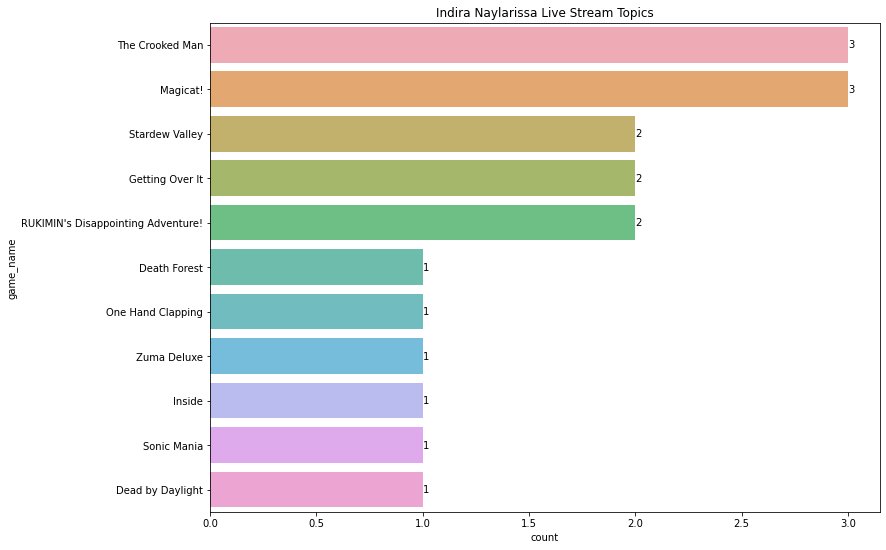

In [56]:
plt.figure(figsize=(12,9))
plt.title('Indira Naylarissa Live Stream Topics')
ax = sns.countplot(y=data_game['game_name'], alpha=0.8, order = data_game['game_name'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

In [57]:
data_game[data_game["views"] == max(data_game["views"])]

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
26,27,Berlari untuk sesuatu yang misterius,1576,2022-12-14,Inside,UNKNOWN,Game,04:39:37,20:30:00,01:09,Rabu,20,279.62


In [58]:
data_game[data_game["views"] == min(data_game["views"])]

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
1,2,Bertani mengumpulkan buah!!,479,2022-10-01,Stardew Valley,UNKNOWN,Game,02:43:10,20:30:00,23:13,Sabtu,20,163.17


### Content Name

In [59]:
data[data["content_name"] == "UNKNOWN"]

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
0,1,Ayo kita ngobrol santai dan minum teh!,547,2022-09-30,UNKNOWN,UNKNOWN,Free Talk,02:04:42,20:30:00,22:34,Jum'at,20,124.70
1,2,Bertani mengumpulkan buah!!,479,2022-10-01,Stardew Valley,UNKNOWN,Game,02:43:10,20:30:00,23:13,Sabtu,20,163.17
3,4,Hantu bengkok yang tidak seram,575,2022-10-04,The Crooked Man,UNKNOWN,Game,03:56:20,20:00:00,23:56,Selasa,20,236.33
4,5,Apa yang harus kita lakukan saat hujan?,947,2022-10-07,UNKNOWN,UNKNOWN,Free Talk,02:32:35,20:30:00,23:02,Jum'at,20,152.58
5,6,"Ayo ngobrol, kali ini beneran",612,2022-10-15,UNKNOWN,UNKNOWN,Free Talk,01:55:27,21:00:00,22:55,Sabtu,21,115.45
6,7,"Hantu bengkok yang tidak seram, Part 02!",620,2022-10-17,The Crooked Man,UNKNOWN,Game,03:16:48,20:30:00,23:46,Senin,20,196.80
7,8,"Menjadi petani professional sungguhan, ini ser...",790,2022-10-18,Stardew Valley,UNKNOWN,Game,02:28:58,20:30:00,22:58,Selasa,20,148.97
8,9,Terjebak di hutan? Ezpz sih ini sepertinya,694,2022-10-20,Death Forest,UNKNOWN,Game,02:29:23,20:30:00,22:59,Kamis,20,149.38
9,10,Apa yang kalian lakukan malam ini?,801,2022-10-23,UNKNOWN,UNKNOWN,Free Talk,02:32:23,20:00:00,22:32,Minggu,20,152.38
10,11,Meninggalkan jejak si botak disini,831,2022-10-26,Getting Over It,UNKNOWN,Game,02:47:11,20:30:00,23:17,Rabu,20,167.18


In [60]:
data_content = data[data["content_name"] != "UNKNOWN"]

In [61]:
data_content["content_name"].unique()

array(['Duolingo', 'Y-MAIL BOX!', 'Meirukis', 'Scary Video',
       'Video Reaction'], dtype=object)

In [62]:
data_content.head()

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
2,3,Ni hao ma? Xie xie ni!,421,2022-10-02,UNKNOWN,Duolingo,Free Talk,02:09:23,20:30:00,22:39,Minggu,20,129.38
11,12,Surat apa yang datang hari ini?,908,2022-10-30,UNKNOWN,Y-MAIL BOX!,Free Talk,03:32:44,20:30:00,00:02,Minggu,20,212.73
12,13,Bisakah buwong gambar??,618,2022-11-02,UNKNOWN,Meirukis,Drawing,02:10:50,20:30:00,22:40,Rabu,20,130.83
16,17,"Iyakah? Astaga ngerinya, ngeri-ngeri",571,2022-11-11,UNKNOWN,Scary Video,Free Talk,02:52:28,20:30:00,23:22,Jum'at,20,172.47
19,20,Kembali ke masa lampau sebentar,784,2022-11-18,UNKNOWN,Y-MAIL BOX!,Free Talk,03:23:37,20:30:00,23:53,Jum'at,20,203.62


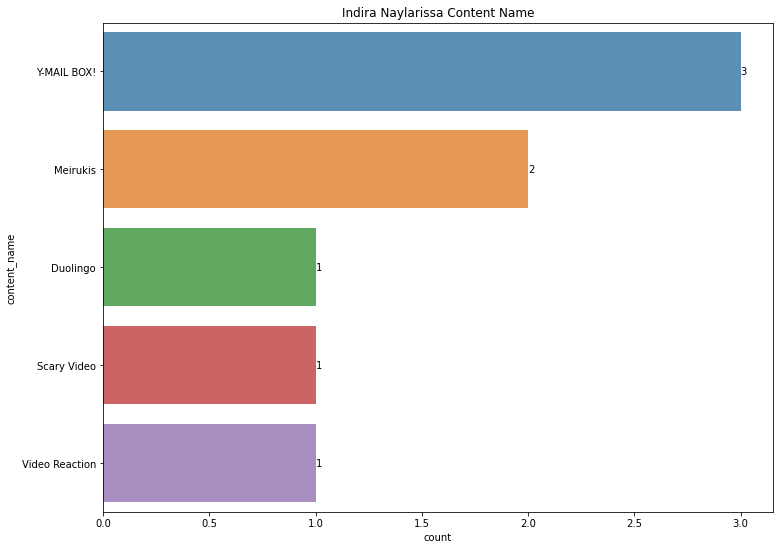

In [63]:
plt.figure(figsize=(12,9))
plt.title('Indira Naylarissa Content Name')
ax = sns.countplot(y=data_content['content_name'], alpha=0.8, order = data_content['content_name'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()